## `Importing Libraries`

In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes as ax

In [28]:
df = pd.read_csv("data_for_lr.csv")
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [29]:
df.isna()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [34]:
df = df.dropna()

In [89]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


### `Splitting Data`

In [90]:

train_input = np.array(df.x[0:500]).reshape(500, 1)
train_output = np.array(df.y[0:500]).reshape(500, 1)

test_input = np.array(df.x[500:699]).reshape(199, 1)
test_output = np.array(df.y[500:699]).reshape(199, 1)

In [101]:
np.array(df.x[0:500]).reshape(500, 1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [102]:
print(f"Training data shape = {train_input.shape}")
print(f"Training data shape = {train_output.shape}")
print(f"Testing data shape = {test_input.shape}")
print(f"Testing data shape = {test_output.shape}")

Training data shape = (500, 1)
Training data shape = (500, 1)
Testing data shape = (199, 1)
Testing data shape = (199, 1)


## `Linear Regression`

### $Forward$ $Propagation$
##### ``Y = mX + C``

In [103]:
def forward_propagation(train_input, parameters):

    m = parameters['m']
    c = parameters['c']

    predictions = np.multiply(m, train_input) + c
    
    return predictions


### $Cost$ $Function$
##### ``∑(1/2*n * (f(x)-y)**2))``

In [104]:
def costFunction(predictions , train_output):
    cost = np.mean((predictions - train_output)**2) *0.5
    return cost

### $Gradient$ $Descent$ $For$ $Backward$ $Propagation$
``df = ∑(f(x) - y)/n``

``dm = df * x``

``dc = df * 1``

In [105]:
def gradient_descent(train_input , train_output, predictions):
    derivatives = dict()
    df = (predictions-train_output)
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives


### $Updating$ $Parameters$ 
``m = m - (learning_rate * dm)``

``learning_rate = ∝``

``c = c - (learning_rate * dc)``

In [106]:
def update_parameters(parameters, derivatives, learning_rate):

    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

### ` Model Training `

In [134]:
def train(train_input, train_output, learning_rate, iters):
    
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)


    plt.figure()
    loss = list()

    for i in range(iters):
        # forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        # calculate cost

        cost = costFunction(predictions , train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        # Plot function
        fig, ax = plt.subplots()

        # Flatten the arrays to ensure compatibility
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()


        plt.plot(train_input, train_output, '+', label='Original')
        plt.plot(train_input, predictions, '*', label='Training')
        plt.show()


        #back propagation
        derivatives = gradient_descent(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters , loss
    

## ``Training``

Iteration = 1, Loss = 1333.1365772089723


<Figure size 640x480 with 0 Axes>

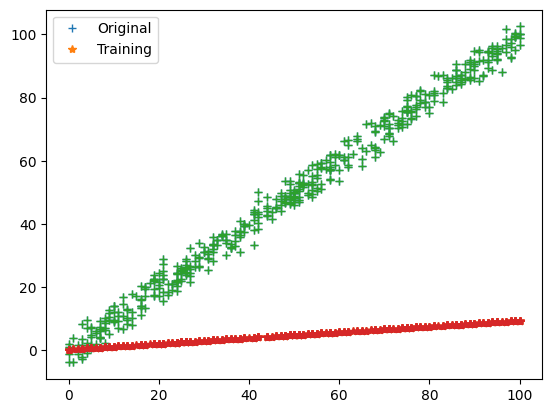

Iteration = 2, Loss = 606.9982723284664


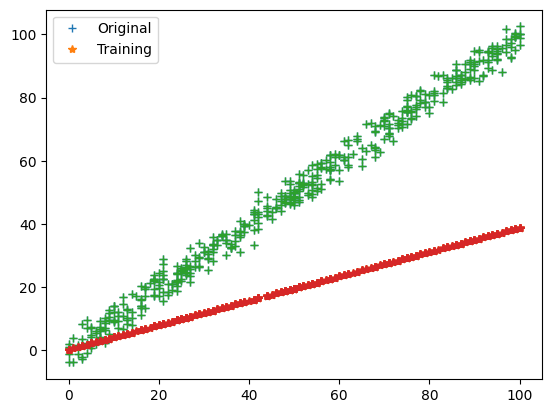

Iteration = 3, Loss = 277.5485182720503


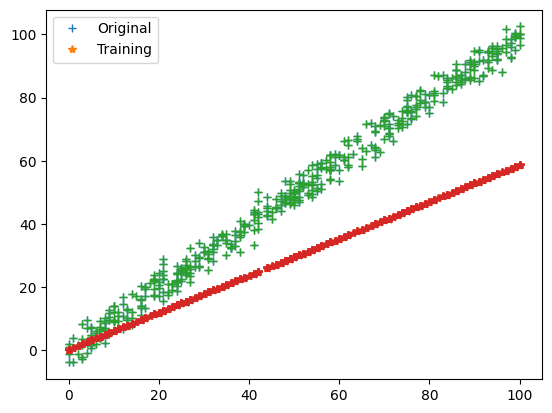

Iteration = 4, Loss = 128.07679911315344


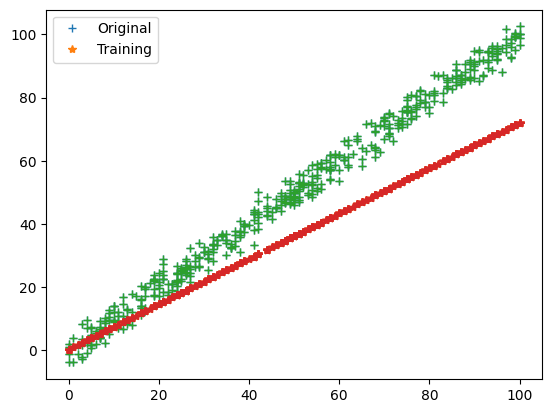

Iteration = 5, Loss = 60.26131373839235


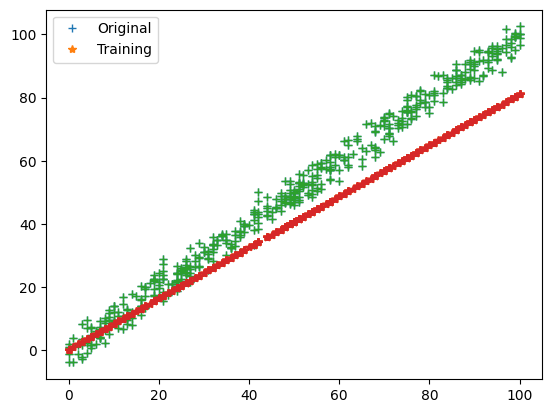

Iteration = 6, Loss = 29.493352077345232


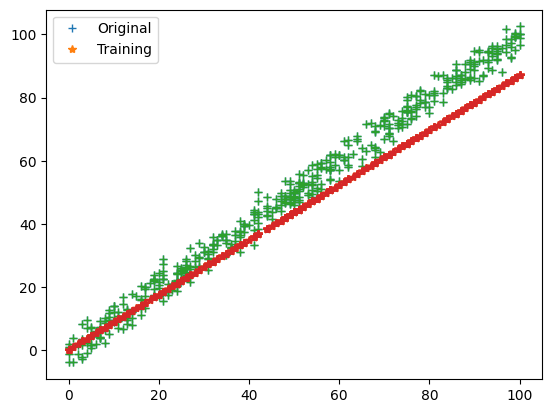

Iteration = 7, Loss = 15.533892960616264


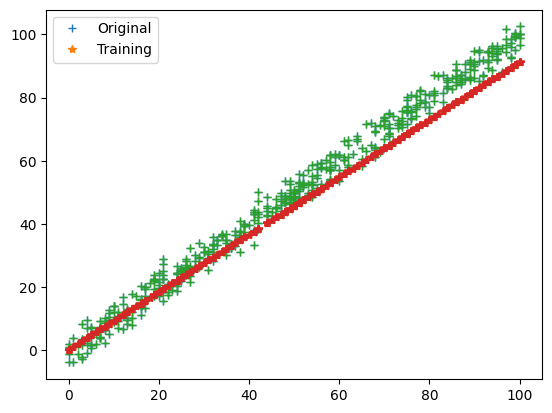

Iteration = 8, Loss = 9.200470066076472


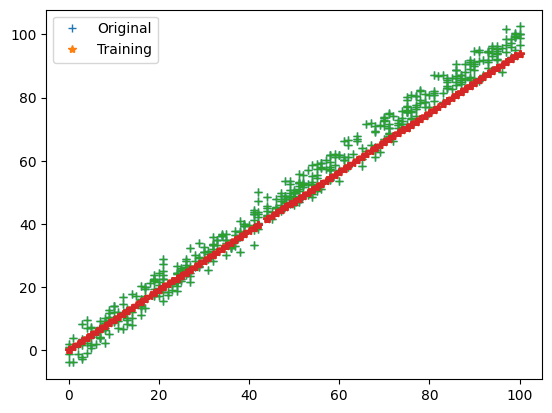

Iteration = 9, Loss = 6.326988252497764


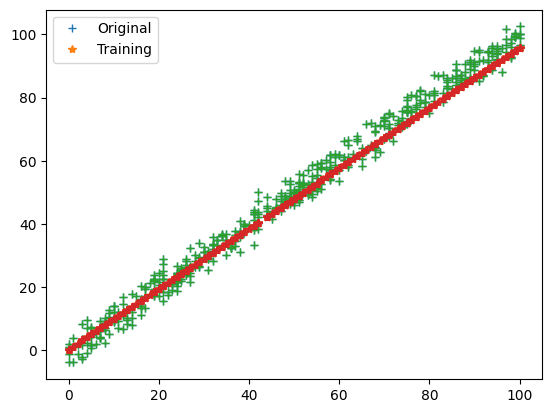

Iteration = 10, Loss = 5.0232855397663405


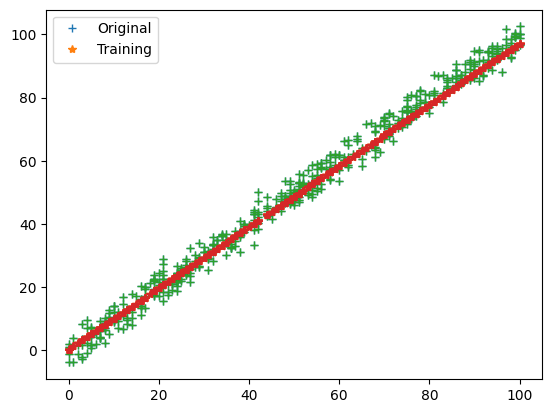

Iteration = 11, Loss = 4.431793343883213


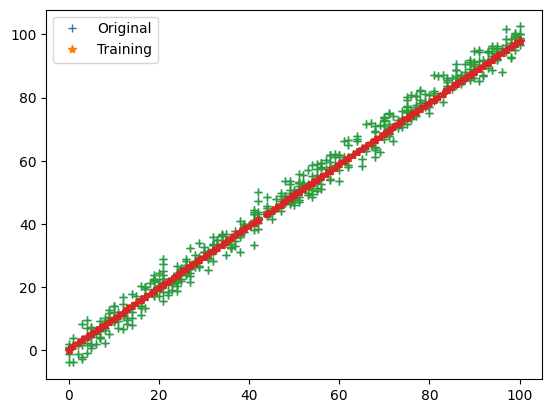

Iteration = 12, Loss = 4.163431848409738


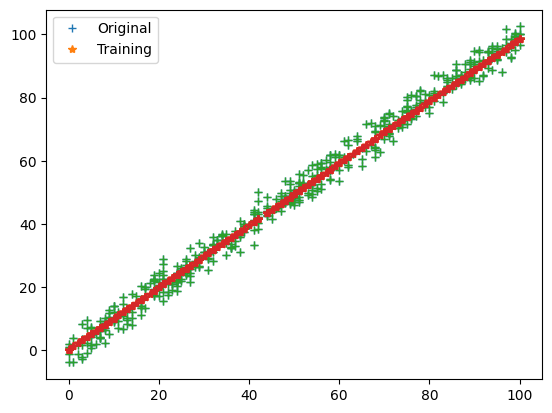

Iteration = 13, Loss = 4.041675109666882


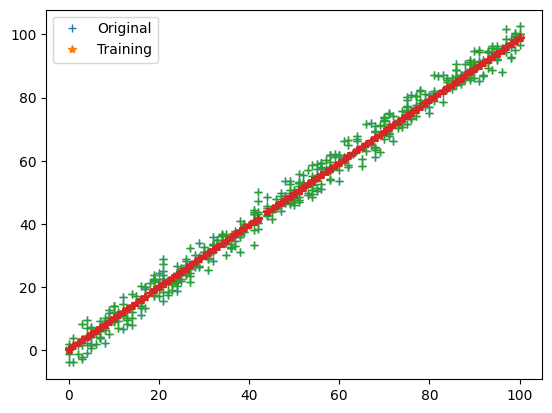

Iteration = 14, Loss = 3.986433111480026


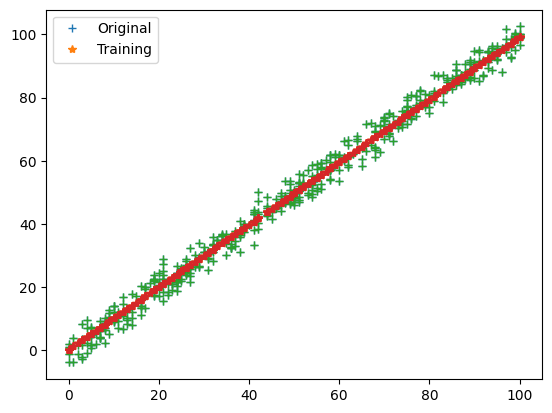

Iteration = 15, Loss = 3.9613689247997574


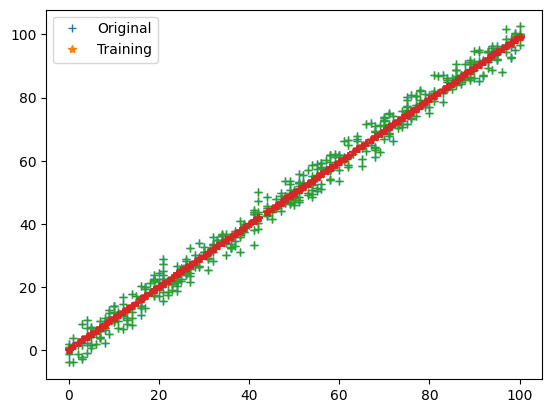

Iteration = 16, Loss = 3.9499964446680704


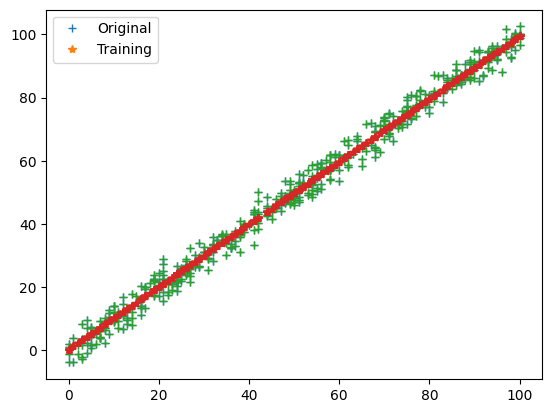

Iteration = 17, Loss = 3.944835907004828


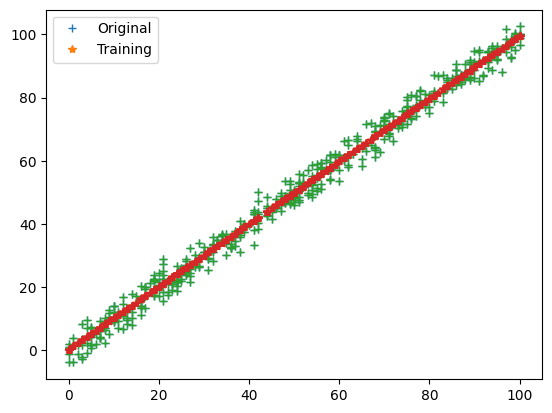

Iteration = 18, Loss = 3.9424937345619724


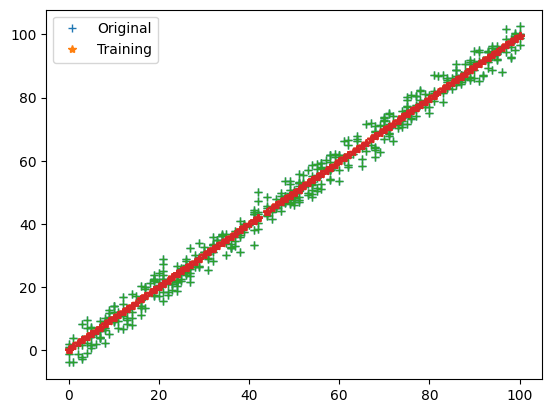

Iteration = 19, Loss = 3.9414302575831957


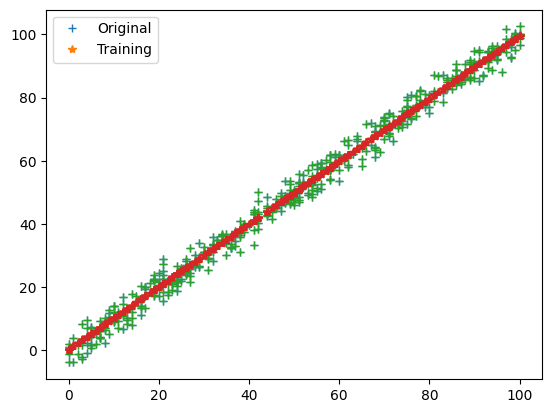

Iteration = 20, Loss = 3.9409469261946533


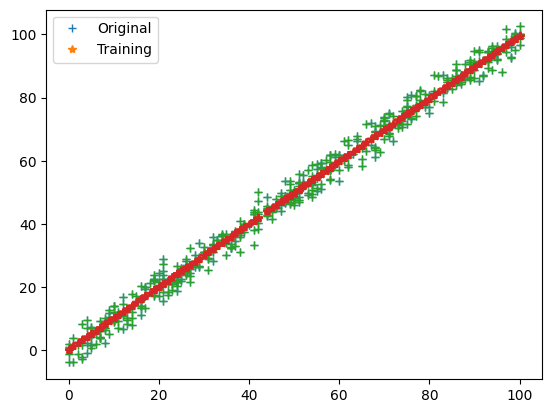

In [139]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [140]:
print(parameters)

{'m': 0.9932538302676506, 'c': 0.25348264288692096}


In [142]:
loss

[1333.1365772089723,
 606.9982723284664,
 277.5485182720503,
 128.07679911315344,
 60.26131373839235,
 29.493352077345232,
 15.533892960616264,
 9.200470066076472,
 6.326988252497764,
 5.0232855397663405,
 4.431793343883213,
 4.163431848409738,
 4.041675109666882,
 3.986433111480026,
 3.9613689247997574,
 3.9499964446680704,
 3.944835907004828,
 3.9424937345619724,
 3.9414302575831957,
 3.9409469261946533]

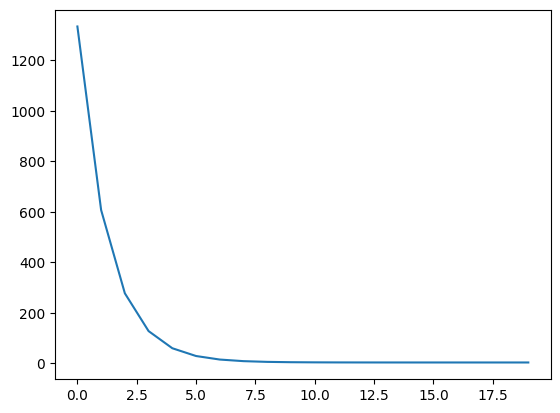

In [144]:
plt.plot(loss)

### ``Test Prediction``

In [145]:
test_prediction = test_input*parameters['m'] + parameters['c']


In [155]:
print(costFunction(test_output , test_prediction))

3.9973914448258245


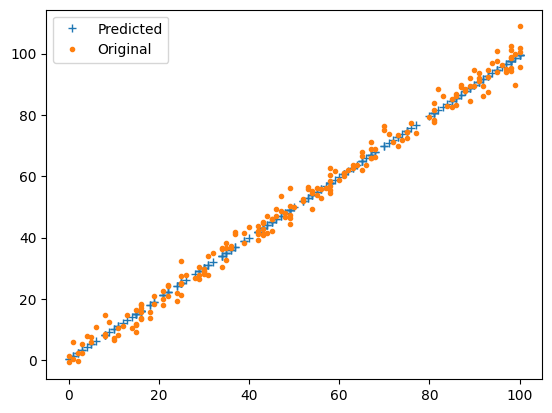

In [151]:
plt.plot(test_input , test_prediction , '+' , label='Predicted')
plt.plot(test_input , test_output , '.' , label='Original')
plt.legend()
plt.show()